In [634]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import folium




%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'font.family': 'sans'})

WebDriverException: Message: 'geckodriver' executable needs to be in PATH. 


In [631]:
data = pd.read_csv('../data/raw/SAMHSA_Colorado_Substance_Abuse_and_Mental_Health_Service_Providers.csv')
data.head()
data.columns

Index(['X', 'Y', 'OBJECTID', 'Provider_Name', 'Provider_Name2', 'Address',
       'Address2', 'City', 'State', 'Zip', 'County', 'Phone', 'Website_URL',
       'Date_Last_Update', 'Type_', 'Detoxification', 'Mental_Health',
       'Substance_Abuse', 'Transitional_Housing', 'Opiod_Treatment_Settings',
       'SAMHSA_Cert_Opioid_Treatment_Program', 'Buprenorphine_Maintenance',
       'Buprenorphine_Maintenance_for_Predetermined_Time',
       'Buprenorphine_Detoxification', 'Buprenorphine_used_in_Treatment',
       'Naltrexone_used_in_Treatment', 'Methadone_Maintenance',
       'Methadone_Maintenance_for_Predetermined_time',
       'Methadone_Detoxification', 'Prescribes_administers_Buprenorphine',
       'Prescribes_administers_Naltrexone',
       'Relapse_prevention_from_Naltrexone',
       'Use_methadone_buprenorphine_for_pain_mgmt_emergency',
       'Accepts_clients_on_opioid_medication',
       'Do_not_use_medication_for_Opioid_Addiction',
       'Does_not_treat_Opioid_Addiction', 'Fa

In [668]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 42 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   X                                                    506 non-null    float64
 1   Y                                                    506 non-null    float64
 2   OBJECTID                                             506 non-null    int64  
 3   Provider_Name                                        506 non-null    object 
 4   Provider_Name2                                       218 non-null    object 
 5   Address                                              506 non-null    object 
 6   Address2                                             192 non-null    object 
 7   City                                                 506 non-null    object 
 8   State                                                506 non-null    o

In [669]:
data.isna().sum()

X                                                        0
Y                                                        0
OBJECTID                                                 0
Provider_Name                                            0
Provider_Name2                                         288
Address                                                  0
Address2                                               314
City                                                     0
State                                                    0
Zip                                                      0
County                                                   0
Phone                                                    0
Website_URL                                              0
Date_Last_Update                                         0
Type_                                                    0
Detoxification                                         473
Mental_Health                                          3

In [677]:
data['Type_'].value_counts()

Substance abuse treatment                                                           307
Mental health treatment                                                             149
Detoxification, Substance abuse treatment                                            26
Substance abuse treatment, Transitional housing or halfway house                     16
Detoxification, Substance abuse treatment, Transitional housing or halfway house      4
Detoxification                                                                        3
Transitional housing or halfway house                                                 1
Name: Type_, dtype: int64

In [674]:
data[['Type_','Facility_Type']].value_counts()

Type_                                      Facility_Type                                                           
Mental health treatment                    Community Mental Health Center                                              79
                                           Outpatient mental health facility                                           27
                                           Psychiatric hospital or psychiatric unit of a general hospital              13
                                           Residential treatment center (RTC) for children                             13
Substance abuse treatment                  General Hospital                                                             5
Detoxification, Substance abuse treatment  General Hospital                                                             4
                                           Psychiatric Hospital                                                         3
Mental health treatment       

In [689]:
data['Facility_Type'].isna().sum()

353

In [673]:
data[['Type_','SAMHSA_Cert_Opioid_Treatment_Program']].value_counts()

Type_                                      SAMHSA_Cert_Opioid_Treatment_Program     
Substance abuse treatment                  SAMHSA-certified Opioid Treatment Program    4
Detoxification, Substance abuse treatment  SAMHSA-certified Opioid Treatment Program    2
dtype: int64

In [487]:
data[['Provider_Name','SAMHSA_Cert_Opioid_Treatment_Program']]

,Provider_Name,SAMHSA_Cert_Opioid_Treatment_Program
0,Shiloh House,NaN
1,Shiloh House,NaN
2,Shiloh Home Inc,NaN
3,Tennyson Center for Children at,NaN
4,Mount Saint Vincent Home,NaN
...,...,...
501,Comprehensive Behavioral Health Center,SAMHSA-certified Opioid Treatment Program
502,Crossroads Turning Points Inc,SAMHSA-certified Opioid Treatment Program
503,Colorado Treatment Services LLC,SAMHSA-certified Opioid Treatment Program
504,Grand Junction Metro Treatment Ctr,SAMHSA-certified Opioid Treatment Program


In [488]:
facility_types= pd.DataFrame(data['Type_'].value_counts())
facility_types = facility_types.rename({'Type_':"Count" }, axis=1)
facility_types = facility_types.reset_index()
facility_types['Types of Facilities'] = facility_types['index']
facility_types.drop('index', axis=1)
facility_types = facility_types[['Types of Facilities','Count']]
facility_types

,Types of Facilities,Count
0,Substance abuse treatment,307
1,Mental health treatment,149
2,"Detoxification, Substance abuse treatment",26
3,"Substance abuse treatment, Transitional housin...",16
4,"Detoxification, Substance abuse treatment, Tra...",4
5,Detoxification,3
6,Transitional housing or halfway house,1


<function matplotlib.pyplot.show(close=None, block=None)>

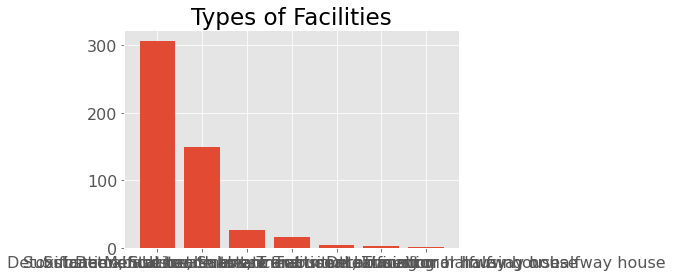

In [489]:
fix, ax = plt.subplots()
x = facility_types['Types of Facilities']
y = facility_types['Count']
ax.bar(x,y)
ax.set_title("Types of Facilities")
plt.show

In [490]:
print(facility_types.loc[[3,4]])
facility_types.loc[[3,4]].sum()


                                 Types of Facilities  Count
3  Substance abuse treatment, Transitional housin...     16
4  Detoxification, Substance abuse treatment, Tra...      4


Types of Facilities    Substance abuse treatment, Transitional housin...
Count                                                                 20
dtype: object

In [493]:
!pwd

/Users/willsullivan/Documents/SDOH_capstone/notebooks


## Read in and clean "Special Connection Providers list"
from https://www.colorado.gov/pacific/sites/default/files/Special%20Connections%20Providers%20January%202021.pdf convertd to csv via adobe acrobat

In [518]:
spec_conn = pd.read_csv('../data/raw/Special_Connections_Providers_January_2021.csv')
spec_conn

,Provider,Area of Service,Phone,Unnamed: 3
0,ARTS - The Haven Mother's House: Residential a...,"Denver, Denver County",303.734.5000,NaN
1,Mile High Behavioral Healthcare - Aspen Miracl...,"Arvada, Jefferson County",303.426.7848,NaN
2,Crossroads' Turning Points: Baltimore Ave: Res...,"Pueblo, Pueblo County",719.545.1181,NaN
3,North Range Behavioral Health: Wings Program,"Greeley, Weld County",970.350.5330\n970.347.2120,NaN
4,Valley Hope: New Directions for Families,"Parker, Arapahoe County",720.623.0747,NaN
5,MindSprings: Women's Recovery Center,"Grand Junction, Mesa County",970.245.4213,NaN
6,Centennial Mental Health Center: Outpatient pr...,"Sterling, CO",970.522.4392,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [519]:
spec_conn = spec_conn.drop([7,8,9,10])
spec_conn = spec_conn.drop('Unnamed: 3',axis=1)

spec_conn['Phone'] = spec_conn['Phone'].str.replace('.','-')
spec_conn['About'] =  spec_conn['Provider'].str.split(':').str[1]
spec_conn = spec_conn.rename({'Provider':'Special Connection Provider'}, axis=1)
spec_conn

/Users/willsullivan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,Special Connection Provider,Area of Service,Phone,About
0,ARTS - The Haven Mother's House: Residential a...,"Denver, Denver County",303-734-5000,"Residential and outpatient provider, childcar..."
1,Mile High Behavioral Healthcare - Aspen Miracl...,"Arvada, Jefferson County",303-426-7848,"Residential and outpatient provider, children..."
2,Crossroads' Turning Points: Baltimore Ave: Res...,"Pueblo, Pueblo County",719-545-1181,Baltimore Ave
3,North Range Behavioral Health: Wings Program,"Greeley, Weld County",970-350-5330\n970-347-2120,Wings Program
4,Valley Hope: New Directions for Families,"Parker, Arapahoe County",720-623-0747,New Directions for Families
5,MindSprings: Women's Recovery Center,"Grand Junction, Mesa County",970-245-4213,Women's Recovery Center
6,Centennial Mental Health Center: Outpatient pr...,"Sterling, CO",970-522-4392,Outpatient provider


In [520]:
spec_conn.loc[3,'Phone'] = '970-350-5330'
spec_conn

,Special Connection Provider,Area of Service,Phone,About
0,ARTS - The Haven Mother's House: Residential a...,"Denver, Denver County",303-734-5000,"Residential and outpatient provider, childcar..."
1,Mile High Behavioral Healthcare - Aspen Miracl...,"Arvada, Jefferson County",303-426-7848,"Residential and outpatient provider, children..."
2,Crossroads' Turning Points: Baltimore Ave: Res...,"Pueblo, Pueblo County",719-545-1181,Baltimore Ave
3,North Range Behavioral Health: Wings Program,"Greeley, Weld County",970-350-5330,Wings Program
4,Valley Hope: New Directions for Families,"Parker, Arapahoe County",720-623-0747,New Directions for Families
5,MindSprings: Women's Recovery Center,"Grand Junction, Mesa County",970-245-4213,Women's Recovery Center
6,Centennial Mental Health Center: Outpatient pr...,"Sterling, CO",970-522-4392,Outpatient provider


In [497]:
data[data['Provider_Name2']=='The Haven Mothers House I'][['Provider_Name2', 'Phone']]

,Provider_Name2,Phone
436,The Haven Mothers House I,303-761-7626


In [498]:
data.loc[437,'Phone'] = '303-734-5000'
data.loc[437,'Phone']

'303-734-5000'

In [499]:
data.loc[466,'Phone'] = '303-694-3829'
data.loc[466,'Phone']

'303-694-3829'

In [500]:
data.loc[55,'Phone'] = '970-245-4213'
data.loc[55,'Phone']

'970-245-4213'

In [501]:
data.iloc[55]

X                                                                                            -108.520379
Y                                                                                              39.078995
OBJECTID                                                                                              56
Provider_Name                                                                        Mind Springs Health
Provider_Name2                                                          Outpatient Clinic Grand Junction
Address                                                                                  515 28 3/4 Road
Address2                                                                                      Building A
City                                                                                      Grand Junction
State                                                                                                 CO
Zip                                                    

In [502]:
spec_conn

,Special Connection Provider,Area of Service,Phone,About
0,ARTS - The Haven Mother's House: Residential a...,"Denver, Denver County",303-734-5000,"Residential and outpatient provider, childcar..."
1,Mile High Behavioral Healthcare - Aspen Miracl...,"Arvada, Jefferson County",303-426-7848,"Residential and outpatient provider, children..."
2,Crossroads' Turning Points: Baltimore Ave: Res...,"Pueblo, Pueblo County",719-545-1181,Baltimore Ave
3,North Range Behavioral Health: Wings Program,"Greeley, Weld County",970-350-5330,Wings Program
4,Valley Hope: New Directions for Families,"Parker, Arapahoe County",720-623-0747,New Directions for Families
5,MindSprings: Women's Recovery Center,"Grand Junction, Mesa County",970-245-4213,Women's Recovery Center
6,Centennial Mental Health Center: Outpatient pr...,"Sterling, CO",970-522-4392,Outpatient provider


In [503]:
# attempt to match on phone

#print(data['Provider_Name', 'phone', 'Phone', 'Provider'])
#data['phone'].isin(spec_conn['phone'])

left_join = pd.merge(data,spec_conn, on='Phone', how='left') #change P to p
left_join.iloc[308]

#left_join[left_join['Special Connection Provider'] !='NaN'].info

left_join['Special Connection Provider'] =left_join['Special Connection Provider'].fillna(0)
left_join['Special_Connection_Approved'] = left_join['Special Connection Provider'].astype(bool)

Spec_Conn_Approved = left_join[left_join['Special_Connection_Approved']==True]

Spec_Conn_Approved = Spec_Conn_Approved[['Provider_Name','Phone','Website_URL','Address','City','Opiod_Treatment_Settings','Buprenorphine_used_in_Treatment','Naltrexone_used_in_Treatment']]
Spec_Conn_Approved

,Provider_Name,Phone,Website_URL,Address,City,Opiod_Treatment_Settings,Buprenorphine_used_in_Treatment,Naltrexone_used_in_Treatment
55,Mind Springs Health,970-245-4213,http://www.mindspringshealth.org,515 28 3/4 Road,Grand Junction,NaN,NaN,NaN
307,Crossroads Turning Points Inc,719-545-1181,http://www.crossroadstp.org,3500 Baltimore Avenue,Pueblo,Accepts clients on opioid medication,NaN,NaN
308,Crossroads Turning Points Inc,719-545-1181,http://www.crossroadstp.org,3470 Baltimore Avenue,Pueblo,Accepts clients on opioid medication,NaN,NaN
321,Colorado West Regional MH Ctr,970-245-4213,http://www.mindspringshealth.org,2800 Riverside Parkway,Grand Junction,Accepts clients on opioid medication,NaN,NaN
437,University of Colorado Denver/ARTS,303-734-5000,http://www.artstreatment.org/,3630 West Princeton Circle,Denver,"Buprenorphine used in Treatment, Accepts clien...",Buprenorphine used in Treatment,NaN
484,Centennial Mental Health Center Inc,970-522-4392,http://www.centennialmhc.org,211 West Main Street,Sterling,"Buprenorphine maintenance, Buprenorphine used ...",Buprenorphine used in Treatment,Naltrexone used in Treatment


In [504]:
left_join['Special_Connection_Approved'].value_counts()

False    500
True       6
Name: Special_Connection_Approved, dtype: int64

In [505]:
left_join = left_join.rename({'Type_':'Type'},axis=1)
left_join.to_csv('../data/processed/SAMSHA_data_with_Special_Connections.csv')

In [506]:
!pwd


/Users/willsullivan/Documents/SDOH_capstone/notebooks


In [507]:

df = pd.read_csv('../data/processed/SAMSHA_data_with_Special_Connections.csv')
df.head()

,Unnamed: 0,X,Y,OBJECTID,Provider_Name,Provider_Name2,Address,Address2,City,State,...,Facility_Type,Age_Groups_Served,Date_Data_Published_CDPHE,Directions,LATITUDE,LONGITUDE,Special Connection Provider,Area of Service,About,Special_Connection_Approved
0,0,-105.097323,39.578575,1,Shiloh House,Estes,7623 South Estes Court,NaN,Littleton,CO,...,Residential treatment center (RTC) for children,Children and Adolescents,October 2018,https://maps.google.com/?q=7623 South Estes Co...,39.578575,-105.097323,0,NaN,NaN,False
1,1,-105.085631,39.586359,2,Shiloh House,Yarrow,7227 South Yarrow Court,NaN,Littleton,CO,...,Residential treatment center (RTC) for children,Children and Adolescents,October 2018,https://maps.google.com/?q=7227 South Yarrow C...,39.586359,-105.085631,0,NaN,NaN,False
2,2,-105.070828,39.590418,3,Shiloh Home Inc,Portland,6629 West Portland Avenue,NaN,Littleton,CO,...,Residential treatment center (RTC) for children,Children and Adolescents,October 2018,https://maps.google.com/?q=6629 West Portland ...,39.590418,-105.070828,0,NaN,NaN,False
3,3,-105.043408,39.759405,4,Tennyson Center for Children at,Colorado Christian Home,2950 Tennyson Street,NaN,Denver,CO,...,Residential treatment center (RTC) for children,Children and Adolescents,October 2018,https://maps.google.com/?q=2950 Tennyson Stree...,39.759405,-105.043408,0,NaN,NaN,False
4,4,-105.035369,39.774457,5,Mount Saint Vincent Home,NaN,4159 Lowell Boulevard,NaN,Denver,CO,...,Residential treatment center (RTC) for children,Children and Adolescents,October 2018,https://maps.google.com/?q=4159 Lowell Bouleva...,39.774457,-105.035369,0,NaN,NaN,False


In [508]:
df['Special_Connection_Approved'].value_counts()

False    500
True       6
Name: Special_Connection_Approved, dtype: int64

In [509]:
df.columns

Index(['Unnamed: 0', 'X', 'Y', 'OBJECTID', 'Provider_Name', 'Provider_Name2',
       'Address', 'Address2', 'City', 'State', 'Zip', 'County', 'Phone',
       'Website_URL', 'Date_Last_Update', 'Type', 'Detoxification',
       'Mental_Health', 'Substance_Abuse', 'Transitional_Housing',
       'Opiod_Treatment_Settings', 'SAMHSA_Cert_Opioid_Treatment_Program',
       'Buprenorphine_Maintenance',
       'Buprenorphine_Maintenance_for_Predetermined_Time',
       'Buprenorphine_Detoxification', 'Buprenorphine_used_in_Treatment',
       'Naltrexone_used_in_Treatment', 'Methadone_Maintenance',
       'Methadone_Maintenance_for_Predetermined_time',
       'Methadone_Detoxification', 'Prescribes_administers_Buprenorphine',
       'Prescribes_administers_Naltrexone',
       'Relapse_prevention_from_Naltrexone',
       'Use_methadone_buprenorphine_for_pain_mgmt_emergency',
       'Accepts_clients_on_opioid_medication',
       'Do_not_use_medication_for_Opioid_Addiction',
       'Does_not_treat_Op

In [510]:
types 

,Type,Count
0,Substance abuse treatment,307
1,Mental health treatment,149
2,"Detoxification, Substance abuse treatment",26
3,"Substance abuse treatment, Transitional housin...",16
4,"Detoxification, Substance abuse treatment, Tra...",4
5,Detoxification,3
6,Transitional housing or halfway house,1


In [511]:
types = pd.DataFrame(df['Type'].value_counts(),index=None)

types = types.reset_index()
types = types.rename({'index':'Type', 'Type':'Count'}, axis=1)
types.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    7 non-null      object
 1   Count   7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [667]:
types = types.sort_values(by=['Count'])
sum_ = types['Count'].sum()
types['Percentage'] = round(types['Count']/sum_ * 100,2)
types.to_csv('../data/interim/SAMSHA_by_types_CO.csv')
types

,Type,Count,Percentage
6,Transitional housing or halfway house,1,0.20
5,Detoxification,3,0.59
4,"Detoxification, Substance abuse treatment, Tra...",4,0.79
3,"Substance abuse treatment, Transitional housin...",16,3.16
2,"Detoxification, Substance abuse treatment",26,5.14
1,Mental health treatment,149,29.45
0,Substance abuse treatment,307,60.67


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

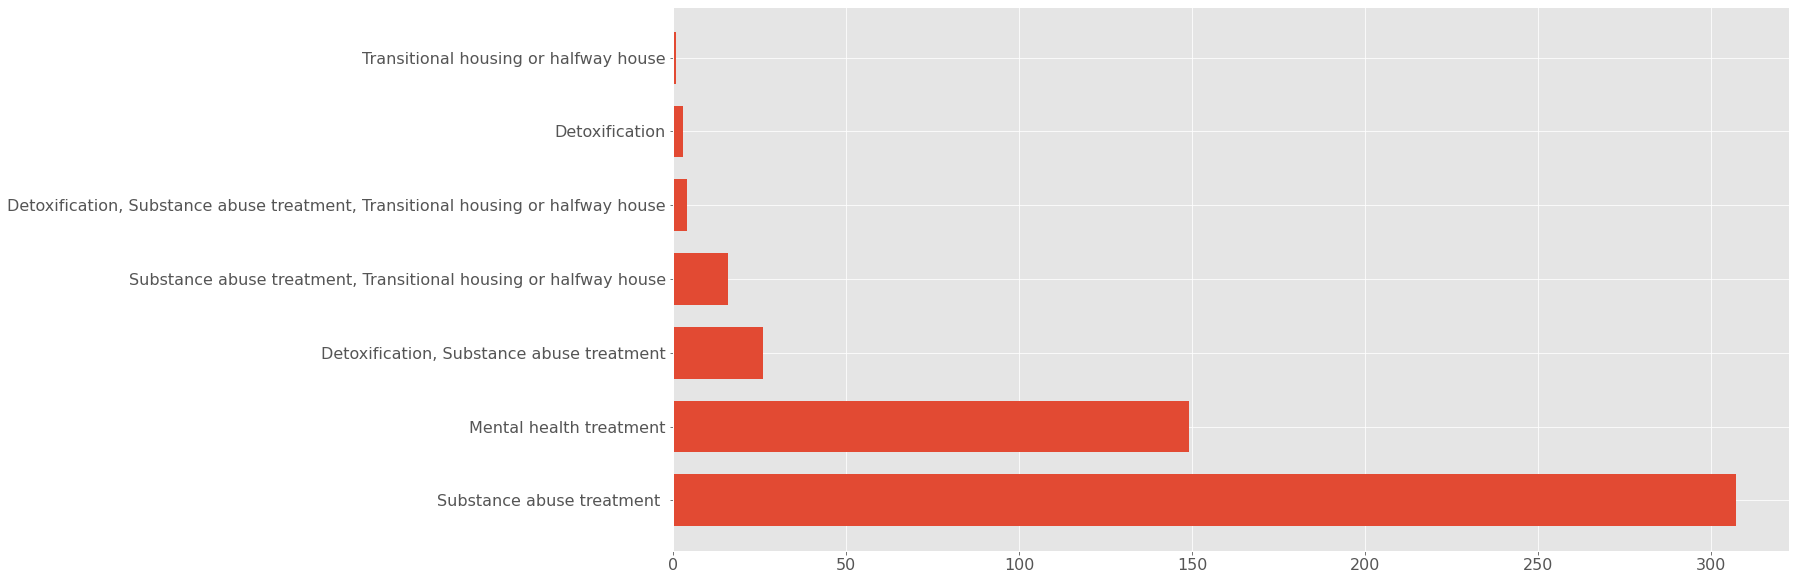

In [513]:
fig, ax = plt.subplots(figsize=(20,10))
x = types['Count'].values
y = types['Type'].values
ax.barh(y, width=x, height=0.7 )

# for i in range(len(x)):
#     plt.text(i,x)

plt.plot
#plt.savefig('../data/processed/Facility_Types.png')


In [562]:
trans_housing = df[df['Transitional_Housing']=='Transitional housing or halfway house']
trans_housing = trans_housing[["Provider_Name", 'Y', 'X', 'City', 'Website_URL', 'Opiod_Treatment_Settings','Special_Connection_Approved','LATITUDE', 'LATITUDE']]
trans_housing = trans_housing[trans_housing['Opiod_Treatment_Settings'] != 'Does not treat opioid addiction']
trans_housing = trans_housing[trans_housing['Opiod_Treatment_Settings'] != 'Do not use medication for opioid addiction']
trans_housing

# print(trans_housing['City'].value_counts().sum())
print(trans_housing['City'])



#trans_housing['City']



# frn = ['Denver', 'Aurora', 'Greeley', 'Boulder', 'Littleton', 'Broomfield']

# frs = ['Colorado Springs', 'Las Animas']

# ws = ['Grand Junction']
       
# conditions or cities_lst

# outcome or region_lst
    
    
# trans_housing[‘Region’] = np.select(cities_lst, region_lst)




# for group, name in trans_housing.groupby('City'):
#     print(group)
#     print(name)

140          Las Animas
316              Denver
317              Denver
318              Aurora
319             Greeley
320             Greeley
321      Grand Junction
401              Denver
402              Aurora
435              Denver
438    Colorado Springs
440    Colorado Springs
447             Boulder
451           Littleton
461          Broomfield
498             Boulder
Name: City, dtype: object


In [564]:
sc = df[['Type','Provider_Name', 'Y','X','City']][df['Special_Connection_Approved']==True]

print(sc['City'].value_counts().sum())
print(sc['City'].value_counts())

6
Grand Junction    2
Pueblo            2
Denver            1
Sterling          1
Name: City, dtype: int64


# Mapping Special Connections Facilities

In [584]:
sc

,Type,Provider_Name,Y,X,City
55,Mental health treatment,Mind Springs Health,39.078995,-108.520379,Grand Junction
307,Substance abuse treatment,Crossroads Turning Points Inc,38.307135,-104.634664,Pueblo
308,Substance abuse treatment,Crossroads Turning Points Inc,38.306881,-104.634998,Pueblo
321,"Substance abuse treatment, Transitional housin...",Colorado West Regional MH Ctr,39.064456,-108.530421,Grand Junction
437,Substance abuse treatment,University of Colorado Denver/ARTS,39.639356,-105.036275,Denver
484,Substance abuse treatment,Centennial Mental Health Center Inc,40.625196,-103.213791,Sterling


In [578]:
sc_locs =sc[['Y','X','Provider_Name']]



Y                          39.078995
X                        -108.520379
Provider_Name    Mind Springs Health
Name: 55, dtype: object

In [643]:
sc_map = folium.Map(location=[39.6393556, -105.0362754],zoom_start=7)

#special connections approved facilities: 
for Y,X, Provider_Name in zip(sc['Y'], sc['X'], sc['Provider_Name']):

    folium.Marker(
        [Y,X],
        popup=Provider_Name,
        icon=folium.Icon(color='pink',icon="star")
    ).add_to(sc_map)





sc_map

#sc_map.save('sc_map.html')

# Mapping Residential Substance Abuse Facilities 

In [686]:
trans_housing[['Y','X','Provider_Name']]


,Y,X,Provider_Name
140,38.084881,-103.142810,Colorado Coalition for the Homeless
316,39.718751,-104.989520,Sobriety House Inc
317,39.753805,-104.989207,Sobriety House Inc
318,39.739778,-104.869816,New Start Recovery
319,40.418112,-104.696000,North Range Behavioral Health
320,40.417891,-104.695011,North Range Behavioral Health
321,39.064456,-108.530421,Colorado West Regional MH Ctr
401,39.738066,-104.955998,Sobriety House Inc
402,39.723156,-104.822933,Reintegration Ministries
435,39.677680,-104.933912,Sandstone Care


In [642]:
th_map = folium.Map(location=[39.6393556, -105.0362754],zoom_start=7)


#map residential treatment facilities
for Y,X, Provider_Name in zip(trans_housing['Y'], trans_housing['X'],trans_housing['Provider_Name']):

    folium.Marker(
        [Y,X],
        popup=Provider_Name,
        icon=folium.Icon(icon="home")
    ).add_to(th_map)

th_map
#th_map.save('th_map.html')

In [640]:
sc_and_th= folium.Map(location=[39.6393556, -105.0362754],zoom_start=7)

#special connections approved facilities: 
for Y,X, Provider_Name in zip(sc['Y'], sc['X'], sc['Provider_Name']):

    folium.Marker(
        [Y,X],
        popup=Provider_Name,
        icon=folium.Icon(color='pink',icon="star")
    ).add_to(sc_and_th)




#map residential treatment facilities
for Y,X, Provider_Name in zip(trans_housing['Y'], trans_housing['X'],trans_housing['Provider_Name']):

    folium.Marker(
        [Y,X],
        popup=Provider_Name,
        icon=folium.Icon(icon="home")
    ).add_to(sc_and_th)

sc_and_th
#sc_and_th.save('sc_and_th.html')


In [684]:

    df_map = folium.Map(location=[39.6393556, -105.0362754],zoom_start=7)

    for Y,X, Provider_Name in zip(df['Y'], df['X'], df['Provider_Name']):
        folium.Marker(
            [Y,X],
            popup=Provider_Name,
            icon=folium.Icon(color='blue')
        ).add_to(df_map)
    df_map

# Mapping Births by Facility